### Importing all require Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

C:\Users\shrey\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Importing Datasets

In [2]:
df1 = pd.read_excel("Data/case_study1.xlsx")
df2 = pd.read_excel("Data/case_study2.xlsx")

### Display settings

In [3]:
pd.set_option("display.max_columns", None)
plt.style.use('Solarize_Light2')

def add_bar_labels(ax):
    #ax = plt.gca()
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2., i.get_height(), 
                '%d' % int(i.get_height()), fontsize=10,
                ha="center", va='bottom')

### High-level Summary of Data

In [4]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


In [5]:
df1.shape

(51336, 26)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

### Analyzing and Removing Null Values

#### DATASET-1

In [8]:
for i in df1.columns:
    if len(df1[df1[i] == -99999]) !=0:
        print(i,":-",len(df1[df1[i] == -99999]))
    

Age_Oldest_TL :- 40
Age_Newest_TL :- 40


In [9]:
len(df1[df1['Age_Oldest_TL'] == -99999])

40

In [10]:
df1 = df1[df1['Age_Oldest_TL'] != -99999]

In [11]:
for i in df1.columns:
    if len(df1[df1[i] == -99999]) !=0:
        print(i,":-",len(df1[df1[i] == -99999]))
    

#### DATASET-2

In [12]:
df2_temp = df2
for i in df2_temp.columns:
    if len(df2_temp[df2_temp[i] == -99999]) !=0:
        print(i,":-", round((len(df2_temp[df2_temp[i] == -99999])/df2_temp.shape[0])*100, 2),"%" )
    

time_since_recent_payment :- 8.36 %
time_since_first_deliquency :- 70.03 %
time_since_recent_deliquency :- 70.03 %
max_delinquency_level :- 70.03 %
max_deliq_6mts :- 25.11 %
max_deliq_12mts :- 21.1 %
tot_enq :- 12.31 %
CC_enq :- 12.31 %
CC_enq_L6m :- 12.31 %
CC_enq_L12m :- 12.31 %
PL_enq :- 12.31 %
PL_enq_L6m :- 12.31 %
PL_enq_L12m :- 12.31 %
time_since_recent_enq :- 12.31 %
enq_L12m :- 12.31 %
enq_L6m :- 12.31 %
enq_L3m :- 12.31 %
pct_currentBal_all_TL :- 0.14 %
CC_utilization :- 92.79 %
PL_utilization :- 86.56 %
max_unsec_exposure_inPct :- 45.15 %


In [13]:
columnsToBeRemoved = []
for i in df2_temp.columns:
    if len(df2_temp[df2_temp[i] == -99999]) != 0 and round((len(df2_temp[df2_temp[i] == -99999])/df2_temp.shape[0])*100, 2) > 30:
        print(i,":-", round((len(df2_temp[df2_temp[i] == -99999])/df2_temp.shape[0])*100, 2),"%" )
        columnsToBeRemoved.append(i)
    

time_since_first_deliquency :- 70.03 %
time_since_recent_deliquency :- 70.03 %
max_delinquency_level :- 70.03 %
CC_utilization :- 92.79 %
PL_utilization :- 86.56 %
max_unsec_exposure_inPct :- 45.15 %


In [14]:
columnsToBeRemoved

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [15]:
df2_temp_temp = df2_temp
df2_temp_temp = df2_temp_temp.drop(columnsToBeRemoved, axis = 1)

In [16]:
df2_temp_temp.shape

(51336, 56)

In [17]:

for i in df2_temp_temp.columns:
    df2_temp_temp = df2_temp_temp.loc[df2_temp[i] != -99999]

In [18]:
df2_temp_temp.shape

(34026, 56)

In [19]:
print("PERCENT OF DATA THAT WE LEFT WITH :- ",round(len(df2_temp_temp)/len(df2), 2)*100, '%')

PERCENT OF DATA THAT WE LEFT WITH :-  66.0 %


In [20]:
columnsToBeRemoved = []
for i in df2_temp.columns:
    if len(df2_temp[df2_temp[i] == -99999]) > 10000 :
        print(i,":-", round((len(df2_temp[df2_temp[i] == -99999])/df2_temp.shape[0])*100, 2),"%" )
        columnsToBeRemoved.append(i)
    

time_since_first_deliquency :- 70.03 %
time_since_recent_deliquency :- 70.03 %
max_delinquency_level :- 70.03 %
max_deliq_6mts :- 25.11 %
max_deliq_12mts :- 21.1 %
CC_utilization :- 92.79 %
PL_utilization :- 86.56 %
max_unsec_exposure_inPct :- 45.15 %


In [21]:
df2_temp = df2_temp.drop(columnsToBeRemoved, axis = 1)
df2_temp.shape

(51336, 54)

In [22]:

for i in df2_temp.columns:
    df2_temp = df2_temp.loc[df2_temp[i] != -99999]

In [23]:
df2_temp.shape

(42066, 54)

In [24]:
print("PERCENT OF DATA THAT WE LEFT WITH :- ",round(len(df2_temp)/len(df2), 2)*100, '%')

PERCENT OF DATA THAT WE LEFT WITH :-  82.0 %


In [25]:
flag = False        
for i in df2_temp.columns:
    if len(df2_temp[df2_temp[i] == -99999]) !=0:
        print(i,":-",len(df2_temp[df2_temp[i] == -99999]))
        flag = True
        
if flag is False:
    print("!! THERE IS NO NULL VALUE !!")

!! THERE IS NO NULL VALUE !!


In [26]:
df2 = df2_temp

In [27]:
flag = False        
for i in df1.columns:
    if len(df1[df1[i] == -99999]) !=0:
        print(i,":-",len(df1[df1[i] == -99999]))
        flag = True
        
if flag is False:
    print("!! THERE IS NO NULL VALUE !!")

!! THERE IS NO NULL VALUE !!


### Merging Datasets

In [28]:
# CHECKING COMMON COLUMNS NAME
for i in df1.columns:
    if i in list(df2.columns):
        print(i)

PROSPECTID


In [29]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [30]:
df = pd.merge(df1, df2, how = 'inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'])

In [31]:
df.shape

(42064, 79)

In [32]:
print("DF-1 SHAPE :-", df1.shape)
print("DF-2 SHAPE :-", df2.shape)
print("DF SHAPE :-", df.shape)

DF-1 SHAPE :- (51296, 26)
DF-2 SHAPE :- (42066, 54)
DF SHAPE :- (42064, 79)


### Detailed Analysis

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          420

In [34]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


#### DETAILED ANALYSIS OF CATEGORICAL COLUMNS 

#### 1. MARITALSTATUS 

#### -- UNIVARIATE ANALYSIS

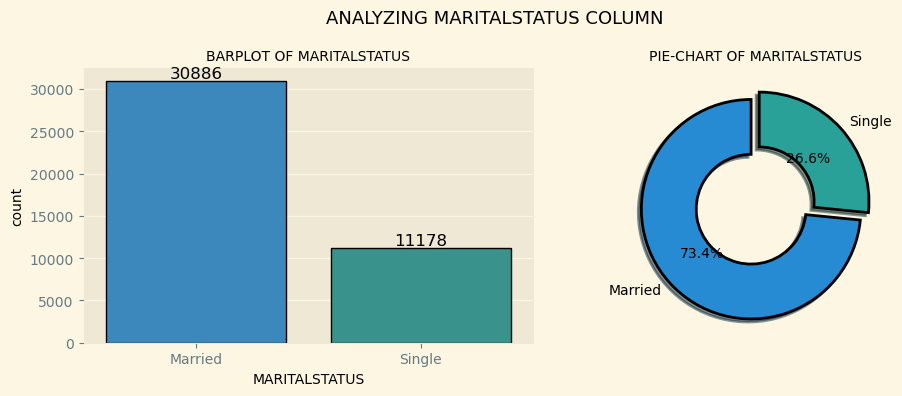

In [35]:
f, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(data=df, x='MARITALSTATUS',ax=ax[0], edgecolor='black')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)
ax[0].set_title("BARPLOT OF MARITALSTATUS",size=10)   
ax[1].pie(x=df['MARITALSTATUS'].value_counts(),
          labels=df['MARITALSTATUS'].value_counts().index,
         explode=[0.05, 0.05],
         autopct='%1.1f%%',
        shadow=True,
        startangle=90, 
        wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5})

ax[1].set_title("PIE-CHART OF MARITALSTATUS", size=10)

plt.suptitle("ANALYZING MARITALSTATUS COLUMN", size=13)
plt.tight_layout()
plt.show()

#### -- BIVARIATE ANALYSIS

In [37]:
# pivot_df = pd.crosstab(df['Approved_Flag'],df['MARITALSTATUS'],  normalize='index') * 100

# pivot_df_long = pivot_df.reset_index().melt(id_vars='Approved_Flag', var_name='MARITALSTATUS', value_name='Percentage')

# sns.barplot(data=pivot_df_long, x='MARITALSTATUS', y='Percentage', hue='Approved_Flag', ci=None)

# # Add labels and title
# plt.title('100% Stacked Bar Plot: Marital Status vs Approval Flag', size = 13)
# plt.xlabel('Marital Status')
# plt.ylabel('Percentage')

# # Show the plot
# plt.show()

#### CHI-SQUARE TEST FOR CATEGORICAL COLUMNS

In [39]:
# CHI-SQUARE TEST
from scipy.stats import chi2_contingency
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i,"->", pval)

MARITALSTATUS -> 3.578180861038862e-233
EDUCATION -> 2.6942265249737532e-30
GENDER -> 1.907936100186563e-05
last_prod_enq2 -> 0.0
first_prod_enq2 -> 7.84997610555419e-287


In [40]:
# ALL OF THEM HAVE P-VALUE LESS THA 0.05 SO WE WILL TAKE ALL THE PARAMENTERS 

#### VIF SEQUENTIAL CHECK FOR NUMERICAL COLUMNS


In [43]:
# VIF FOR NUMERICAL COLUMNS:-
numerical_columns = []
for i in df.columns:
    if df[i].dtype != "object" and i != 'PROSPECTID':
        numerical_columns.append(i)

In [44]:
numerical_columns

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

In [53]:
# VIF SEQUENTIAL CHECK

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = df[numerical_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
columns_index = 0

for i in range(0, total_columns):
    vif_value = variance_inflation_factor(vif_data, columns_index)
    print(i,". ", numerical_columns[i], "->", vif_value)
    
    if vif_value <= 6:
        columns_to_be_kept.append(numerical_columns[i])
        columns_index = columns_index + 1
    else:
        vif_data = vif_data.drop([numerical_columns[i]], axis = 1)

0 .  Total_TL -> inf
1 .  Tot_Closed_TL -> inf
2 .  Tot_Active_TL -> 11.320180023967996
3 .  Total_TL_opened_L6M -> 8.363698035000327
4 .  Tot_TL_closed_L6M -> 6.520647877790928
5 .  pct_tl_open_L6M -> 5.149501618212625
6 .  pct_tl_closed_L6M -> 2.611111040579735
7 .  pct_active_tl -> inf
8 .  pct_closed_tl -> 1788.7926256209232
9 .  Total_TL_opened_L12M -> 8.601028256477228
10 .  Tot_TL_closed_L12M -> 3.8328007921530785
11 .  pct_tl_open_L12M -> 6.099653381646739
12 .  pct_tl_closed_L12M -> 5.5813520096427585
13 .  Tot_Missed_Pmnt -> 1.985584353098778
14 .  Auto_TL -> inf
15 .  CC_TL -> 4.809538302819343
16 .  Consumer_TL -> 23.270628983464636
17 .  Gold_TL -> 30.595522588100053
18 .  Home_TL -> 4.3843464059655854
19 .  PL_TL -> 3.0646584155234238
20 .  Secured_TL -> 2.898639771299252
21 .  Unsecured_TL -> 4.377876915347324
22 .  Other_TL -> 2.2078535836958433
23 .  Age_Oldest_TL -> 4.916914200506864
24 .  Age_Newest_TL -> 5.214702030064725
25 .  time_since_recent_payment -> 3.3861625

In [48]:
len(numerical_columns)

72

#### CHECKING ANOVA FOR THE COLUMNS TO BE KEPT

In [54]:
from scipy.stats import f_oneway

In [55]:
columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])
    
    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']
    
    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)
    
    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [56]:
len(columns_to_be_kept_numerical)

37

In [59]:
# LISTIING ALL THE FINAL FEATURE

In [60]:
features = columns_to_be_kept_numerical + ['MARITALSTATUS','EDUCATION','GENDER','last_prod_enq2','first_prod_enq2','Approved_Flag']

In [63]:
len(features)

43

In [67]:
df = df[features]
df.shape

(42064, 43)

In [72]:
# LABEL ENCODING FOR A CATEGORICAL FEATURES
print("MARITALSTATUS   :- ",df['MARITALSTATUS'].unique())
print("EDUCATION       :- ",df['EDUCATION'].unique())
print("GENDER          :- ",df['GENDER'].unique())
print("last_prod_enq2  :-",df['last_prod_enq2'].unique())
print("first_prod_enq2 :- ",df['first_prod_enq2'].unique())

MARITALSTATUS   :-  ['Married' 'Single']
EDUCATION       :-  ['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']
GENDER          :-  ['M' 'F']
last_prod_enq2  :- ['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']
first_prod_enq2 :-  ['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']


In [73]:
# Ordinal feature -- EDUCATION
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 3

In [78]:
df.loc[df['EDUCATION']=='SSC', ['EDUCATION']] = 1
df.loc[df['EDUCATION']=='12TH', ['EDUCATION']] = 2
df.loc[df['EDUCATION']=='GRADUATE', ['EDUCATION']] = 3
df.loc[df['EDUCATION']=='UNDER GRADUATE', ['EDUCATION']] = 3
df.loc[df['EDUCATION']=='POST-GRADUATE', ['EDUCATION']] = 4
df.loc[df['EDUCATION']=='OTHERS', ['EDUCATION']] = 1
df.loc[df['EDUCATION']=='PROFESSIONAL', ['EDUCATION']] = 3

In [79]:
df['EDUCATION'].unique()

array([2, 3, 1, 4], dtype=object)

<Axes: xlabel='EDUCATION', ylabel='count'>

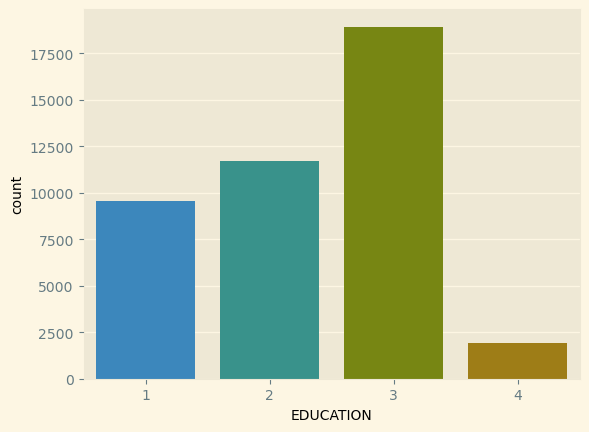

In [80]:
sns.countplot(data=df, x='EDUCATION')

In [82]:
df['EDUCATION'].value_counts(normalize=True)

EDUCATION
3    0.450052
2    0.278219
1    0.226607
4    0.045122
Name: proportion, dtype: float64